<a href="https://colab.research.google.com/github/SGP23/MACHINE_LEARNING_PROJECTS/blob/main/Insurance_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Importing Librarie


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error,root_mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler


#Loading and Exploring the Dataset

In [ ]:
data=pd.read_csv(r"/content/ML Project - Linear Regression Insurance Prediction 16955515670.txt")

In [ ]:
data

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [ ]:
cols=data.columns

In [ ]:
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [ ]:
data.tail()

,age,sex,bmi,children,smoker,region,charges
1333,50,male,30.97,3,no,northwest,10600.5483
1334,18,female,31.92,0,no,northeast,2205.9808
1335,18,female,36.85,0,no,southeast,1629.8335
1336,21,female,25.80,0,no,southwest,2007.9450
1337,61,female,29.07,0,yes,northwest,29141.3603


In [ ]:
data.sample()

,age,sex,bmi,children,smoker,region,charges
345,34,female,29.26,3,no,southeast,6184.2994


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [ ]:
data.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [ ]:
data.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [ ]:
data.isnull().sum()

,0
age,0
sex,0
bmi,0
children,0
smoker,0
region,0
charges,0


#Handling Missing Values

In [ ]:
# Fill missing 'children' values with 0
data["children"]=data["children"].fillna(0)
data.isnull()

,age,sex,bmi,children,smoker,region,charges
0,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...
1333,False,False,False,False,False,False,False
1334,False,False,False,False,False,False,False
1335,False,False,False,False,False,False,False
1336,False,False,False,False,False,False,False


In [ ]:
# Fill missing 'bmi' values with the column mean
data["bmi"]=data["bmi"].fillna(data["bmi"].mean())

In [ ]:
data

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


#Exploratory Data Analysis

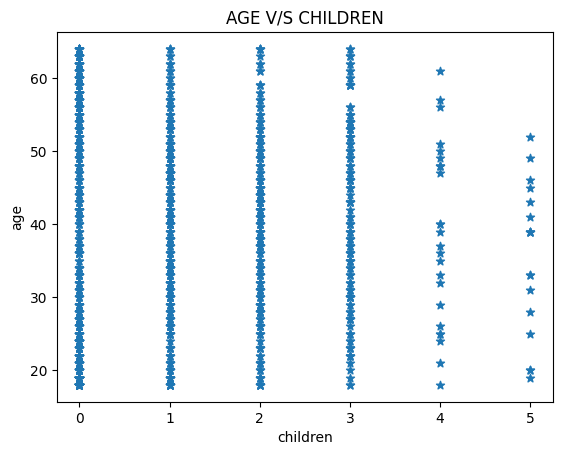

In [ ]:
# Scatter plot: visualizing age vs number of children
plt.xlabel("children")
plt.ylabel("age")
plt.title("AGE V/S CHILDREN")
plt.scatter(data["children"],data["age"],marker="*")
plt.show()

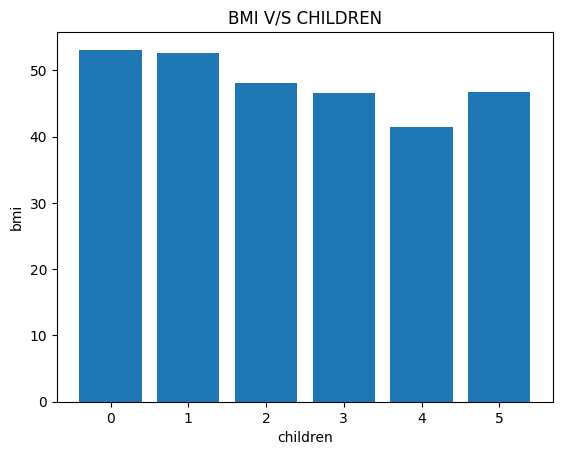

In [ ]:
# Bar plot: comparing BMI across number of children
plt.xlabel("children")
plt.ylabel("bmi")
plt.title("BMI V/S CHILDREN")
plt.bar(data["children"],data["bmi"])
plt.show()

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


#Encoding Categorical Features

In [ ]:
# Convert categorical columns into numeric values
enc=LabelEncoder()
data["sex"]=enc.fit_transform(data["sex"])
data["smoker"]=enc.fit_transform(data["smoker"])
data["region"]=enc.fit_transform(data["region"])

In [ ]:
data

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520
...,...,...,...,...,...,...,...
1333,50,1,30.970,3,0,1,10600.54830
1334,18,0,31.920,0,0,0,2205.98080
1335,18,0,36.850,0,0,2,1629.83350
1336,21,0,25.800,0,0,3,2007.94500


#Feature Scaling

In [ ]:
# Normalize feature values using MinMaxScaler
sc=MinMaxScaler()

In [ ]:
data=sc.fit_transform(data)

In [ ]:
# Rebuild dataframe with original column names
data=pd.DataFrame(data,columns=cols)

In [ ]:
data

,age,sex,bmi,children,smoker,region,charges
0,0.021739,0.0,0.321227,0.0,1.0,1.000000,0.251611
1,0.000000,1.0,0.479150,0.2,0.0,0.666667,0.009636
2,0.217391,1.0,0.458434,0.6,0.0,0.666667,0.053115
3,0.326087,1.0,0.181464,0.0,0.0,0.333333,0.333010
4,0.304348,1.0,0.347592,0.0,0.0,0.333333,0.043816
...,...,...,...,...,...,...,...
1333,0.695652,1.0,0.403820,0.6,0.0,0.333333,0.151299
1334,0.000000,0.0,0.429379,0.0,0.0,0.000000,0.017305
1335,0.000000,0.0,0.562012,0.0,0.0,0.666667,0.008108
1336,0.065217,0.0,0.264730,0.0,0.0,1.000000,0.014144


#Model Preparation
Define independent variables (X) and target (Y)

In [ ]:
x=data.drop("charges",axis=1)

In [ ]:
y=data["charges"]

In [ ]:
x.shape

(1338, 6)

In [ ]:
y.shape

(1338,)

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=11)

#Training the Model

In [ ]:
model=LinearRegression()

In [ ]:
model.fit(x_train,y_train)

LinearRegression()

In [ ]:
model.score(x_train,y_train)

0.7388805137721671

In [ ]:
model.score(x_test,y_test)

0.7993819717035825

#Making Predictions and Assessing Performance

In [ ]:
y_pred=model.predict(x_test)

<ipython-input-38-f37ed7af6f40>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot((y_test-y_pred));


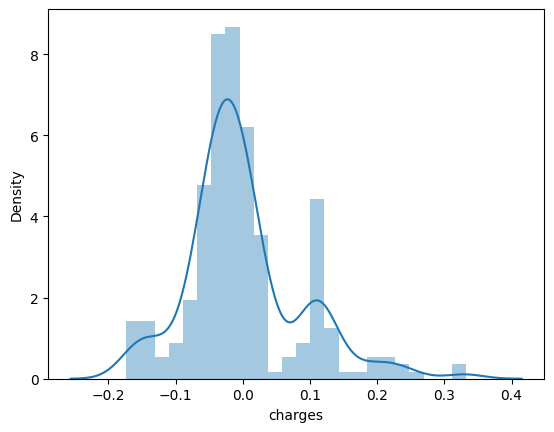

In [ ]:
sns.distplot((y_test-y_pred));
plt.show()

In [ ]:
model.intercept_

np.float64(-0.04924772225011295)

In [ ]:
r2_score(y_test,y_pred)

0.7993819717035825

In [ ]:
mean_squared_error(y_test,y_pred)

0.007088254845350103

In [ ]:
mean_absolute_error(y_test,y_pred)

0.06082870001904845

In [ ]:
root_mean_squared_error(y_test,y_pred)

0.0841917742142907